    # Password Strength Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [3]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [5]:
data.dropna()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [6]:
password_arr=np.array(data)

In [7]:
import random
random.shuffle(password_arr)

In [8]:
y=[elem[1] for elem in password_arr]
X=[elem[0] for elem in password_arr]

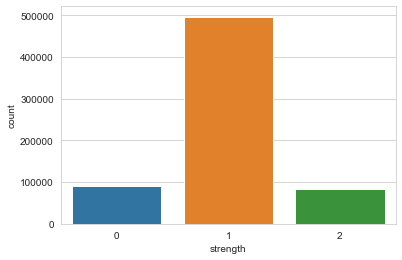

In [10]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='strength', data=data)

In [14]:
def word_into_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters
    

In [15]:
#Perform Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_into_char)
X=vectorizer.fit_transform(X)

In [16]:
vectorizer.vocabulary_

{'k': 58,
 'z': 73,
 'd': 51,
 'e': 52,
 '5': 31,
 '7': 33,
 'i': 56,
 'n': 61,
 'o': 62,
 '3': 29,
 '4': 30,
 'm': 60,
 'g': 54,
 'y': 72,
 '1': 27,
 '2': 28,
 'v': 69,
 's': 66,
 'r': 65,
 'l': 59,
 'a': 48,
 'b': 49,
 'h': 55,
 '8': 34,
 '6': 32,
 '0': 26,
 't': 67,
 'j': 57,
 'f': 53,
 'u': 68,
 'c': 50,
 'w': 70,
 '9': 35,
 'q': 64,
 'p': 63,
 '@': 41,
 '-': 23,
 'x': 71,
 '.': 24,
 '>': 39,
 '&': 18,
 '?': 40,
 '<': 37,
 '!': 13,
 ';': 36,
 '_': 46,
 '%': 17,
 '±': 86,
 '"': 14,
 '~': 77,
 '+': 22,
 '^': 45,
 '/': 25,
 '$': 16,
 ')': 20,
 '(': 19,
 ' ': 12,
 '#': 15,
 'þ': 122,
 'ó': 112,
 '`': 47,
 '{': 74,
 '}': 76,
 '*': 21,
 'ú': 118,
 '\x1c': 10,
 '=': 38,
 '[': 42,
 '\x16': 6,
 'ò': 111,
 '·': 91,
 '\x1e': 11,
 '\x05': 1,
 '\x1b': 9,
 ']': 44,
 '\x19': 8,
 'ô': 113,
 '\\': 43,
 '´': 89,
 'ä': 101,
 'ð': 109,
 'å': 102,
 'â': 100,
 '|': 75,
 '°': 85,
 'õ': 114,
 'ÿ': 123,
 'à': 98,
 '³': 88,
 '\x08': 3,
 'ê': 107,
 'á': 99,
 '¾': 94,
 '‚': 125,
 'ß': 97,
 '÷': 116,
 '«': 84,

In [18]:
feature_names=vectorizer.get_feature_names()
first_document_vector=X[0]

df=pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tf-idf"])
df.sort_values(by=["tf-idf"], ascending=False)

,tf-idf
7,0.591769
5,0.567068
z,0.335864
k,0.291899
d,0.285292
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [22]:
#Logistic Regression with ovr
clf=LogisticRegression(penalty='l2', multi_class='ovr')
clf.fit(X_train, y_train)

C:\Users\vidhy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vidhy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
print(clf.score(X_test,y_test))

0.8113239949823786


In [26]:
#multinomial Logistic Reg
clf=LogisticRegression(penalty='l2', multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.8191266949405651


In [32]:
X_predict=np.array(['12%ab@xy'])
X_predict=vectorizer.transform(X_predict)
y_pred=clf.predict(X_predict)
print(y_pred)

[2]


In [28]:
#XGBoost
import xgboost as xgb
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
print(xgb_clf.score(X_test,y_test))

0.9153948390179798


In [33]:
X_predict=np.array(['12%ab@xy'])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_clf.predict(X_predict)
print(y_pred)

[1]


In [34]:
X_predict=np.array(['V!dhy@$r!'])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_clf.predict(X_predict)
print(y_pred)

[2]


In [35]:
#Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
nb_clf=MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test,y_test)

0.7423914342034525

In [36]:
X_predict=np.array(['12%ab@xy'])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_clf.predict(X_predict)
print(y_pred)

[2]
